# Exploratory data analysis
On the data, cleaned according to the project requirements, we will perform a small EDA so to understand the key features in the distribution of data. The main purposes are:
1) to better understand the dataset and stimulate our curiousity
1) to improve predictions by either regression, classification or neural networks.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabular_data import load_airbnb

%matplotlib inline

In [8]:
# load the dataset
df = pd.read_csv('./airbnb-property-listings/tabular_data/clean_tabular_data.csv')
# drop non-numeric columns
df_numeric = df.drop(columns=['Unnamed: 0', 'Unnamed: 19']).select_dtypes(include='number')

In [9]:
# plot dataframe shape
df.shape

(889, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            889 non-null    int64  
 1   ID                    889 non-null    object 
 2   Category              889 non-null    object 
 3   Title                 889 non-null    object 
 4   Description           829 non-null    object 
 5   Amenities             889 non-null    object 
 6   Location              889 non-null    object 
 7   guests                889 non-null    int64  
 8   beds                  889 non-null    float64
 9   bathrooms             889 non-null    float64
 10  Price_Night           889 non-null    int64  
 11  Cleanliness_rating    889 non-null    float64
 12  Accuracy_rating       889 non-null    float64
 13  Communication_rating  889 non-null    float64
 14  Location_rating       889 non-null    float64
 15  Check-in_rating       8

In [11]:
df.sample(5)

,Unnamed: 0,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,...,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19
210,246,764313ad-60b7-426c-b56a-ffe866f80e37,Chalets,Countryside location with hot tub and sauna,['We are offering our pool house which consist...,"['What this place offers', 'Bathroom', 'Hair d...",Vines Cross England United Kingdom,2,1.0,1.0,...,4.9,5.0,5.0,4.9,4.9,4.9,37.0,https://www.airbnb.co.uk/rooms/46709879?adults...,1,NaN
329,366,1065766b-00f0-4ebb-b28a-7112f94fd44b,Chalets,Rectory Farm Retreat,"['Tucked away in the heart of the Cotswolds, t...","['What this place offers', 'Bathroom', 'Shampo...",Oxfordshire England United Kingdom,1,1.0,1.0,...,4.9,5.0,5.0,5.0,5.0,4.8,26.0,https://www.airbnb.co.uk/rooms/20963767?adults...,1,NaN
348,385,f7857015-7d32-463d-98ac-0d5d813fec1a,Chalets,Willow Log Cabin - Sleeping 2 - Hot Tub - Suffolk,['Willow log cabin is a perfect escape in this...,"['What this place offers', 'Bathroom', 'Hair d...",Suffolk England United Kingdom,2,1.0,1.0,...,4.7,4.8,4.8,4.8,4.8,4.8,19.0,https://www.airbnb.co.uk/rooms/15461520?adults...,1,NaN
545,601,fedd4705-7829-42d7-8f72-9c1d237fc031,Amazing pools,"Natural pool, Luxury hot tub with Glamping & Barn",['Two luxury glamping tents both with king siz...,"['What this place offers', 'Scenic views', 'Ga...",Cambridgeshire England United Kingdom,6,3.0,1.5,...,5.0,5.0,5.0,5.0,5.0,4.6,45.0,https://www.airbnb.co.uk/rooms/49147067?adults...,3,NaN
302,339,2a9f056c-2b97-4bed-90e6-dd93930ae696,Chalets,Charming cottage with stunning views -dog frie...,"['Dog friendly, charming, unique ancient cotta...","['What this place offers', 'Bathroom', 'Hair d...",East Sussex England United Kingdom,4,3.0,1.0,...,5.0,5.0,5.0,4.9,5.0,4.8,39.0,https://www.airbnb.co.uk/rooms/44374096?adults...,2,NaN


In [12]:
df['Category'].unique()

array(['Treehouses', 'Chalets', 'Amazing pools', 'Offbeat', 'Beachfront'],
      dtype=object)

In [13]:
df_numeric.describe()

,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,bedrooms
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,3.872891,2.392576,1.362205,152.536558,4.852306,4.903262,4.932058,4.903487,4.943307,4.764004,34.767154,1.637795
std,2.367820,1.824505,0.817441,127.170901,0.182999,0.135153,0.122274,0.121362,0.103555,0.181982,14.438702,1.058731
min,1.000000,1.000000,0.000000,8.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.300000,3.000000,1.000000
25%,2.000000,1.000000,1.000000,83.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,24.000000,1.000000
50%,4.000000,2.000000,1.000000,119.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,34.000000,1.000000
75%,4.000000,3.000000,1.500000,175.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,44.000000,2.000000
max,16.000000,17.000000,10.000000,1132.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000,10.000000


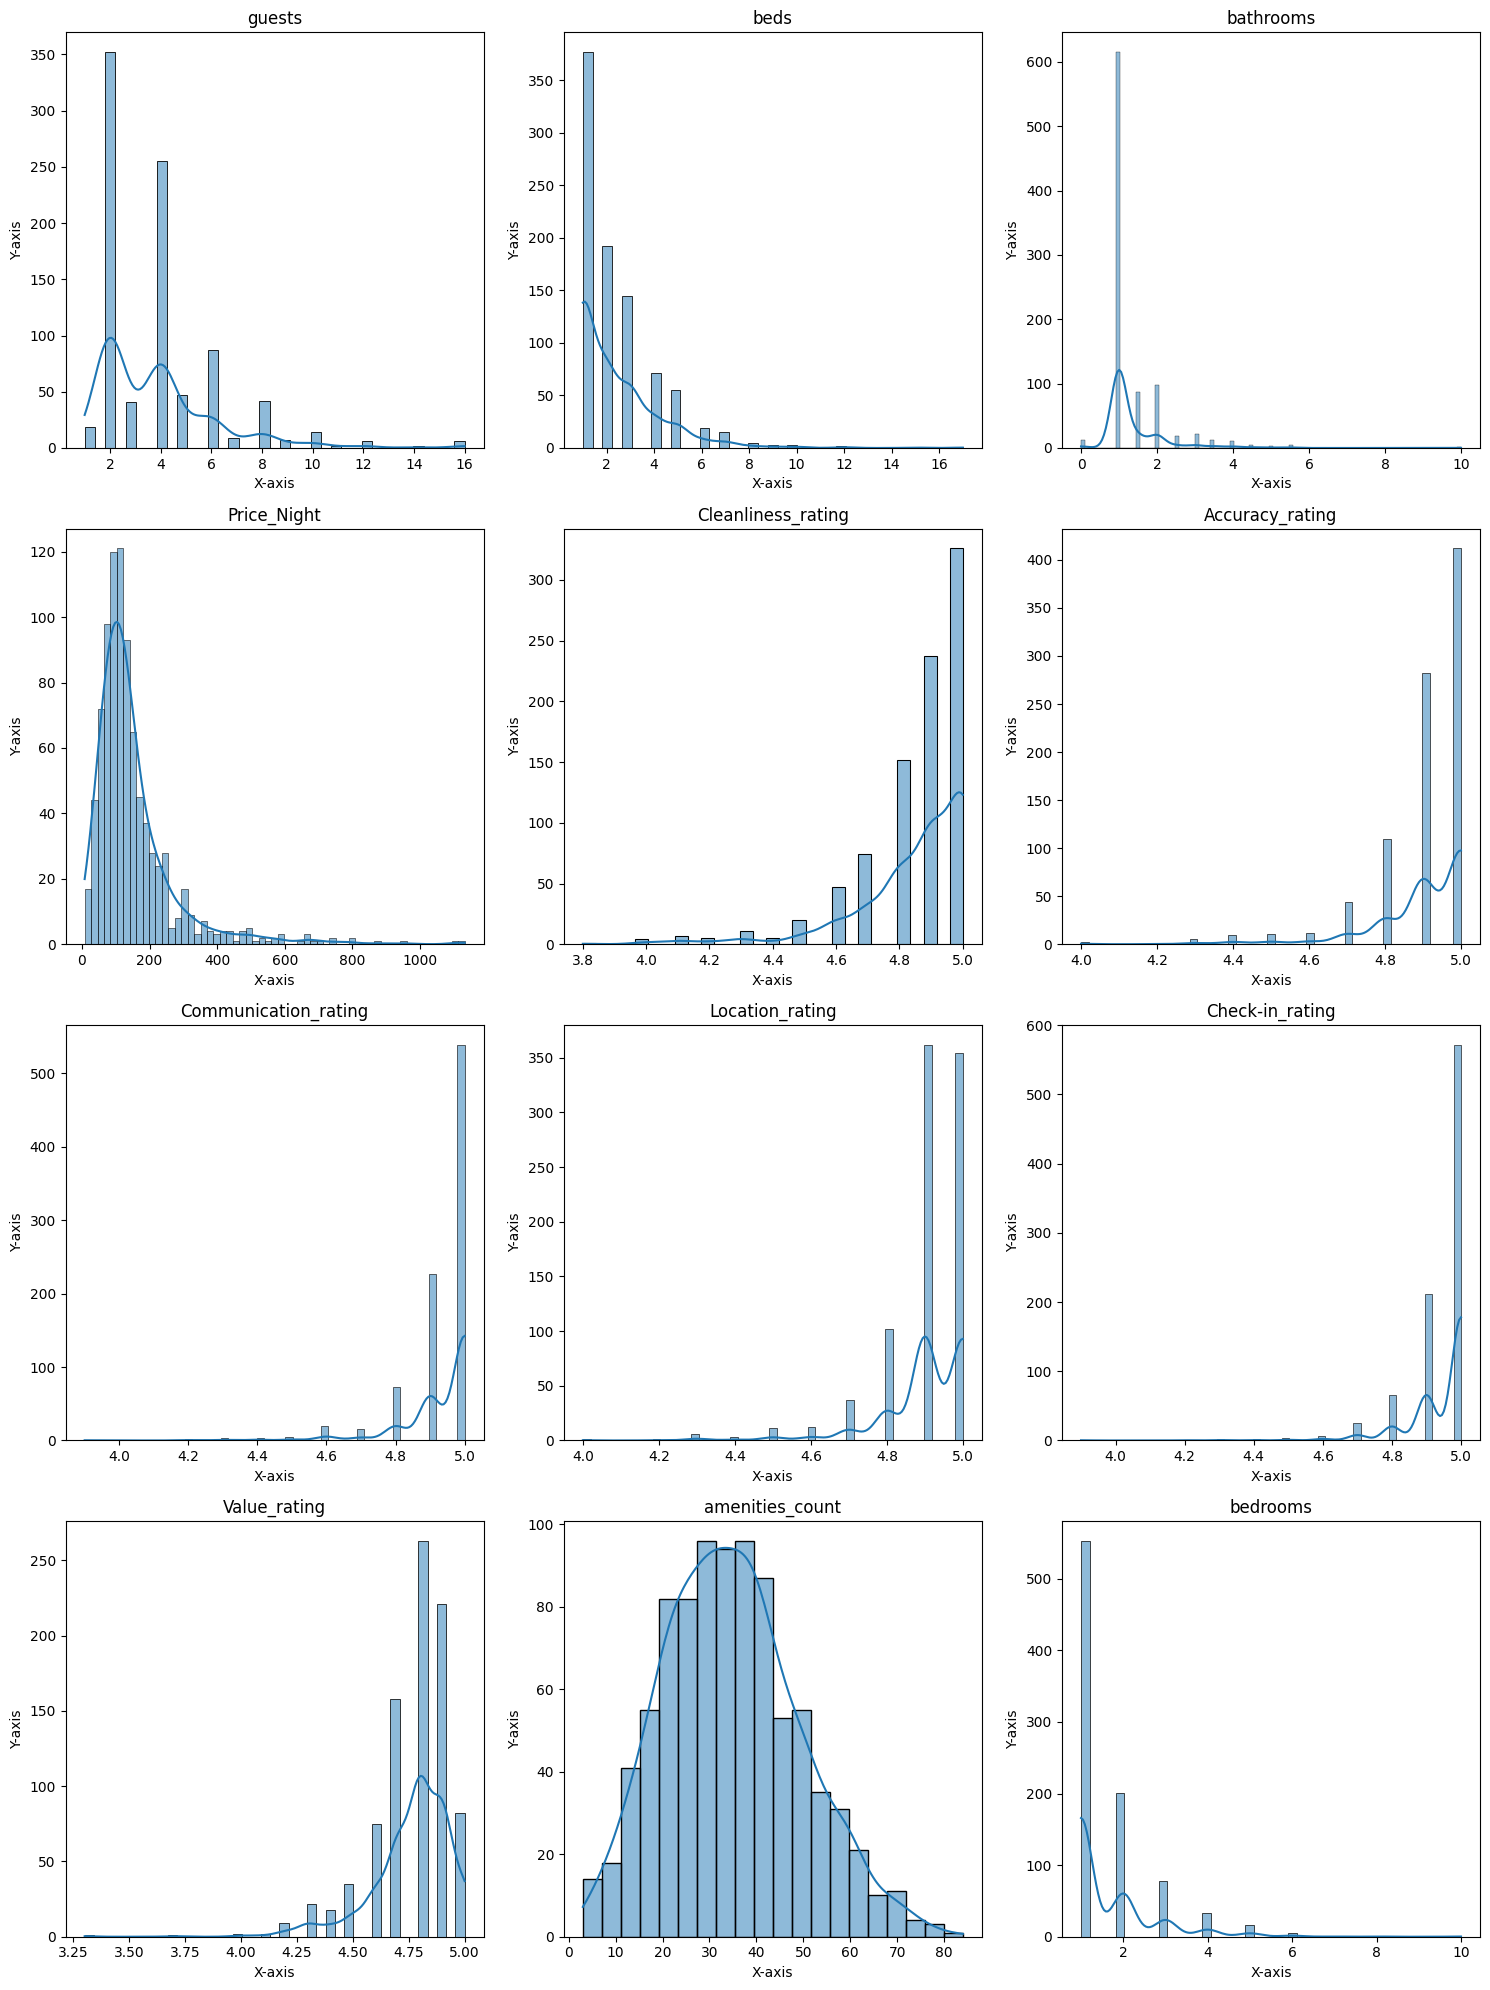

In [25]:
# Determine the number of subplots based on the number of columns
num_cols = len(df_numeric.columns)

# Calculate the number of rows and columns for the subplot grid
num_rows = (num_cols + 2) // 3  # Adjust the number of columns (3) as needed

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the 'axes' array to make it easier to iterate over
axes = axes.ravel()

# Plot each column of the DataFrame in separate subplots
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    sns.histplot(df[column], ax=ax, kde=True, label = column)
    ax.set_title(column)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

# Remove any empty subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout() # Adjust subplot spacing to prevent overlap
plt.show()


<Axes: ylabel='Price_Night'>

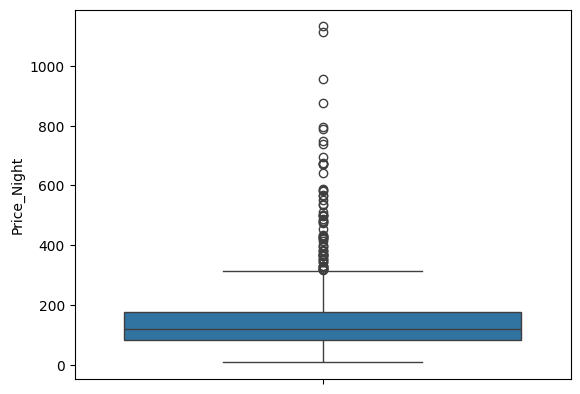

In [37]:
sns.boxplot(df["Price_Night"])

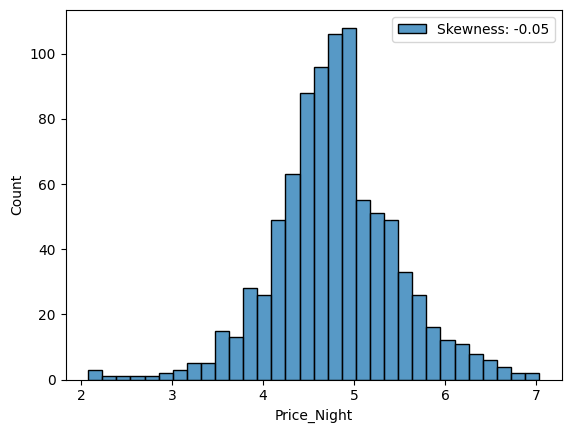

In [19]:
log_price_night = df["Price_Night"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_price_night,label="Skewness: %.2f"%(log_price_night.skew()) )
t.legend()

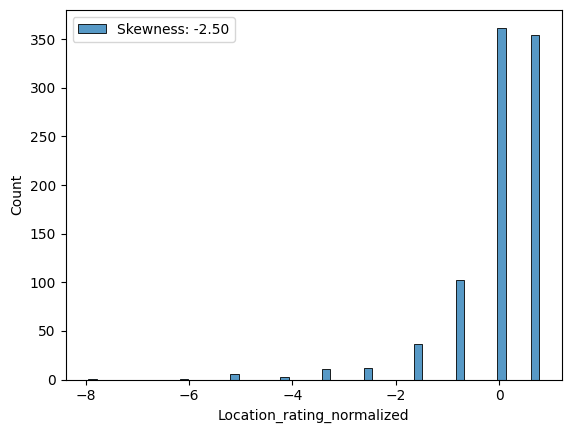

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Location_rating_normalized'] = scaler.fit_transform(df[['Location_rating']].map(lambda i: np.log(i) if i > 0 else 0))
t=sns.histplot(df['Location_rating_normalized'],label="Skewness: %.2f"%(df['Location_rating'].skew()) )
t.legend()
